In [1]:
# Polynomial regression - Solutions

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

%matplotlib inline


In [3]:
# Load the data
df = pd.read_csv('../data/polynomial.csv', index_col=None)
X = df.x.reshape(-1, 1)
y = df.y



In [4]:
# 1st order regression y ~ X
clf = linear_model.LinearRegression()
clf.fit(X,y)
y_hat1 = clf.predict(X)

print("MSE (deg=1) %s"% mean_squared_error(y, y_hat1) )

# create degree 2 polynomial

poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)

# 2nd order regression y ~ X + X^2

clf = linear_model.LinearRegression()
clf.fit(X2,y)
y_hat2 = clf.predict(X2)
print("MSE (deg=2) %s"% mean_squared_error(y, y_hat2) )

# 16th order regression y ~ X + X^2 + ... + X^16

poly = PolynomialFeatures(16)
X16 = poly.fit_transform(X)
# print(X16)
clf = linear_model.LinearRegression()
clf.fit(X16,y)
y_hat16 = clf.predict(X16)
mean_squared_error(y, y_hat16)

print("MSE (deg=16) %s"% mean_squared_error(y, y_hat16) )


MSE (deg=1) 4280.83878406
MSE (deg=2) 680.092920816
MSE (deg=16) 175.620924485


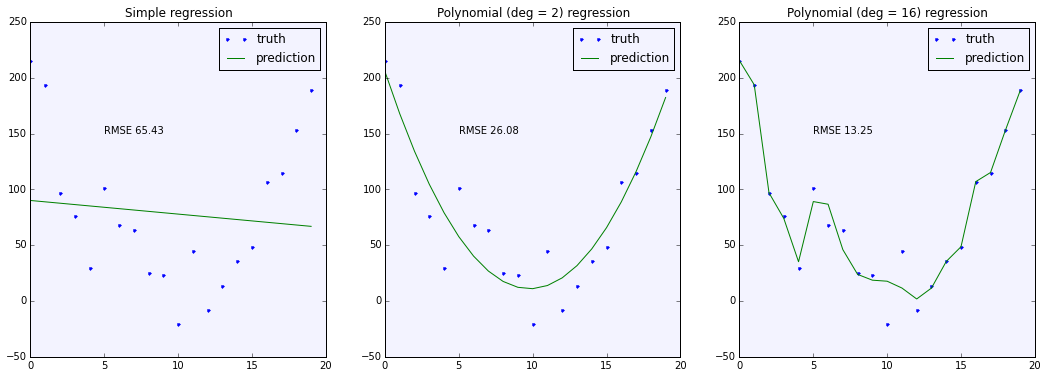

In [21]:
# plot
fig,[ax1,ax2, ax3] = plt.subplots(1,3,figsize=(18,6))

ax1.plot(y,'.', c='b', label='truth')
ax1.plot(y_hat1, c='r', label='prediction')
ax1.set_title("Simple regression")
ax1.annotate("RMSE %0.2f"% np.sqrt(mean_squared_error(y, y_hat1)), xy = (5,150) )
ax1.legend(loc='best')

ax2.plot( y,'.', c='b', label='truth')
ax2.plot(y_hat2, c='r', label='prediction')
ax2.set_title("Polynomial (deg = 2) regression")
ax2.annotate("RMSE %0.2f"% np.sqrt(mean_squared_error(y, y_hat2)), xy = (5,150) )
ax2.legend(loc='best')

ax3.plot( y,'.', c='b', label='truth')
ax3.plot(y_hat16, c='r', label='prediction')
ax3.set_title("Polynomial (deg = 16) regression")
ax3.annotate("RMSE %0.2f"% np.sqrt(mean_squared_error(y, y_hat16)), xy = (5,150) )
ax3.legend(loc='best')


In [22]:
fig.savefig('polynomial_regression.png')

In [9]:
?plt.annotate